## Summary 
In this notebook we use principal component decomposition to generate orthogonal feature sets from a series of images. We can then reconstruct 'fake' images as a random combination of the principal components of the 'real' image dataset.

In [69]:
import sys
import os
sys.path.insert(0, os.getcwd()+"/Utils")
sys.path.insert(0, os.getcwd()+"/Models")
from sklearn.decomposition import PCA
from skimage.io import imshow, imread
import numpy as np
import matplotlib.pyplot as plt
from img_utils import generate_subimages
import random

#### User-Defined Variables

In [96]:
num_components = 50 # Number of principal components to compute
img_size=128 #Size of sub-images to generate from large input image in dataset (assuming width = height)
overlap = 20 # Overlap between subimages 
image_file = 'Data/sem_image.PNG' #Image file that we will section

#### Generate image matrix
Image matrix should be of size $(s \times n)$ where $s=$number of pixels in each sample and $n$ equals number of sample images

In [97]:
x_test = generate_subimages(image_file,img_size, overlap)

#Vectorize sub-images into matrix with each col representing one image
img_array=np.zeros((img_size*img_size,x_test.shape[0]),dtype='uint8')
for i in range(x_test.shape[0]):
    img_array[:,i] = np.squeeze(x_test[i]).reshape((img_size*img_size))

(1569, 1815)


#### Calculate Principal Components

The following will use SVD to calculate the first $p$ principal components where $p$ is defined as num_components in the user defined variables section
output variable *pc_vectors* contains the $p$ principal components with each column holding one principal component. It can be informative to show a few of these components so *pc_array* stores the principal components as arrays that we can plot in the next cell. The output variable *pca_array* is also normalized at this step.

In [107]:
pca = PCA(n_components=num_components)
pca.fit(img_array)
pc_vectors = pca.transform(img_array)

pc_array = np.zeros((img_size,img_size,num_components))
for i in range(num_components):
    this_vector = pc_vectors[:,i];
    this_vector = this_vector# /np.linalg.norm(this_vector)
    pc_array[:,:,i]=this_vector.reshape((img_size,img_size))

#### Plot first few principal components

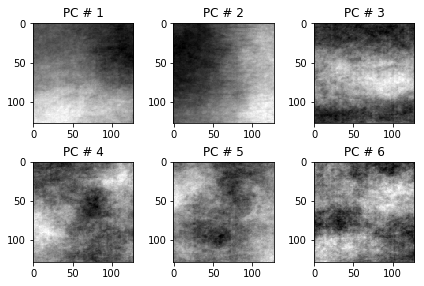

In [108]:
for i in range(6):
    plt.subplot(2,3,i+1)
    pc_array_image = pc_array[:,:,i]
    pc_array_image = (pc_array_image - pc_array_image.min())
    pc_array_image/=pc_array_image.max()
    imshow(pc_array_image)
    plt.title('PC # '+str(i+1))


#### Generate "Random" generated images

Text(0.5, 1.0, 'Sub-Image from Real Data')

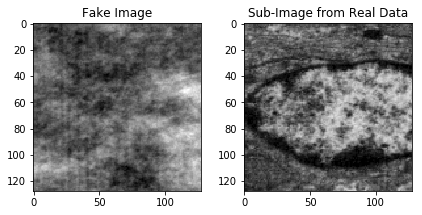

In [111]:
randoms=np.random.rand(num_components,)
randoms = randoms/np.linalg.norm(randoms)
random_img = np.zeros((img_size,img_size))
for i in range(num_components):
    random_img+= pc_array[:,:,i]*randoms[i]
    
random_img = (random_img - random_img.min())
random_img/= random_img.max()
plt.subplot(1,2,1)
imshow(random_img,cmap='gray')
plt.title('Fake Image')

id = random.randint(0,x_test.shape[0])
plt.subplot(1,2,2)
imshow(np.squeeze(x_test[id]))
plt.title('Sub-Image from Real Data')
